<a href="https://colab.research.google.com/github/SwaRna-777/Assignment1/blob/main/AI_NN_assignment_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Libraries


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import cv2
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


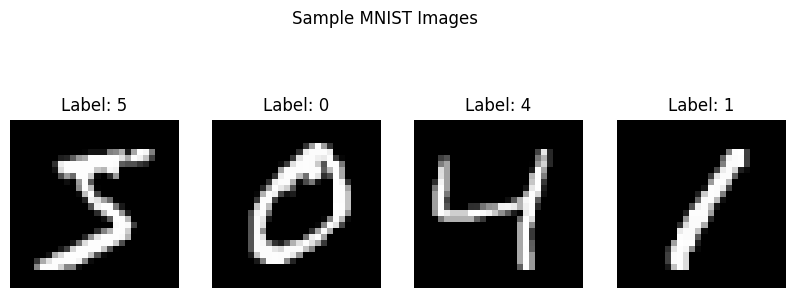

In [ ]:

# DATA LOADING & PREPROCESSING

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Display sample images
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x_train_full[i], cmap='gray')
    plt.title(f"Label: {y_train_full[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Images")
plt.show()

# Normalize pixel values
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train_full = x_train_full.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# One-hot encode labels
y_train_full = to_categorical(y_train_full, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:

# CNN ARCHITECTURE


def build_cnn_model(activation, optimizer_name):

    optimizer_dict = {
        "adam": Adam(),
        "sgd": SGD(),
        "rmsprop": RMSprop()
    }

    model = Sequential([
        Conv2D(32, (3,3), activation=activation,
               padding='same', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(64, (3,3), activation=activation,
               padding='same'),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Flatten(),

        Dense(128, activation=activation),
        Dropout(0.5),
        Dense(64, activation=activation),

        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer_dict[optimizer_name],
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# =========================================
# PART 1 – ReLU vs Sigmoid (Adam & SGD)
# =========================================

results_part1 = []

activations_part1 = ["relu", "sigmoid"]
optimizers_part1 = ["adam", "sgd"]

epochs_list = [5, 10]
batch_sizes = [32, 256]

for act in activations_part1:
    for opt in optimizers_part1:
        for ep in epochs_list:
            for batch in batch_sizes:

                print(f"{act.upper()} + {opt.upper()} | Epochs={ep} | Batch={batch}")

                model = build_cnn_model(act, opt)

                start_time = time.time()

                history = model.fit(
                    x_train_full,
                    y_train_full,
                    epochs=ep,
                    batch_size=batch,
                    validation_split=0.2,
                    verbose=0
                )

                training_time = time.time() - start_time

                test_loss, test_accuracy = model.evaluate(
                    x_test, y_test_cat, verbose=0
                )

                results_part1.append([
                    act,
                    opt,
                    ep,
                    batch,
                    round(test_accuracy,4),
                    round(training_time,2)
                ])

df_part1 = pd.DataFrame(
    results_part1,
    columns=[
        "Activation",
        "Optimizer",
        "Epochs",
        "Batch Size",
        "Test Accuracy",
        "Training Time (s)"
    ]
)

print("\n===== PART 1 RESULTS =====\n")
display(df_part1)

RELU + ADAM | Epochs=5 | Batch=32
RELU + ADAM | Epochs=5 | Batch=256
RELU + ADAM | Epochs=10 | Batch=32
RELU + ADAM | Epochs=10 | Batch=256
RELU + SGD | Epochs=5 | Batch=32
RELU + SGD | Epochs=5 | Batch=256
RELU + SGD | Epochs=10 | Batch=32
RELU + SGD | Epochs=10 | Batch=256
SIGMOID + ADAM | Epochs=5 | Batch=32
SIGMOID + ADAM | Epochs=5 | Batch=256
SIGMOID + ADAM | Epochs=10 | Batch=32
SIGMOID + ADAM | Epochs=10 | Batch=256
SIGMOID + SGD | Epochs=5 | Batch=32
SIGMOID + SGD | Epochs=5 | Batch=256
SIGMOID + SGD | Epochs=10 | Batch=32
SIGMOID + SGD | Epochs=10 | Batch=256

===== PART 1 RESULTS =====



,Activation,Optimizer,Epochs,Batch Size,Test Accuracy,Training Time (s)
0,relu,adam,5,32,0.9894,377.20
1,relu,adam,5,256,0.9882,368.27
2,relu,adam,10,32,0.9922,735.66
3,relu,adam,10,256,0.9897,678.65
4,relu,sgd,5,32,0.9726,348.42
5,relu,sgd,5,256,0.8973,387.80
6,relu,sgd,10,32,0.9818,719.23
7,relu,sgd,10,256,0.9397,673.94
8,sigmoid,adam,5,32,0.1135,391.80
9,sigmoid,adam,5,256,0.1135,393.54


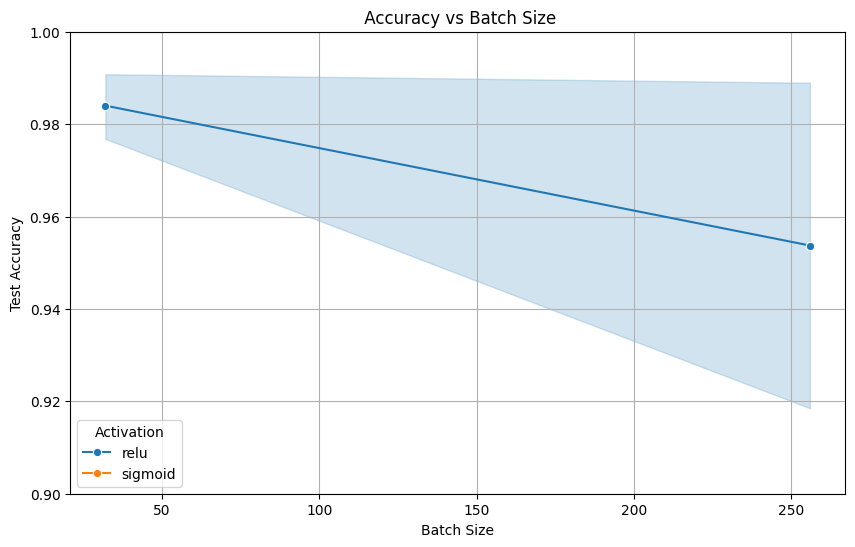

In [ ]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df_part1,
    x="Batch Size",
    y="Test Accuracy",
    hue="Activation",
    marker="o"
)

plt.title(" Accuracy vs Batch Size")
plt.ylim(0.9,1.0)
plt.grid(True)
plt.show()

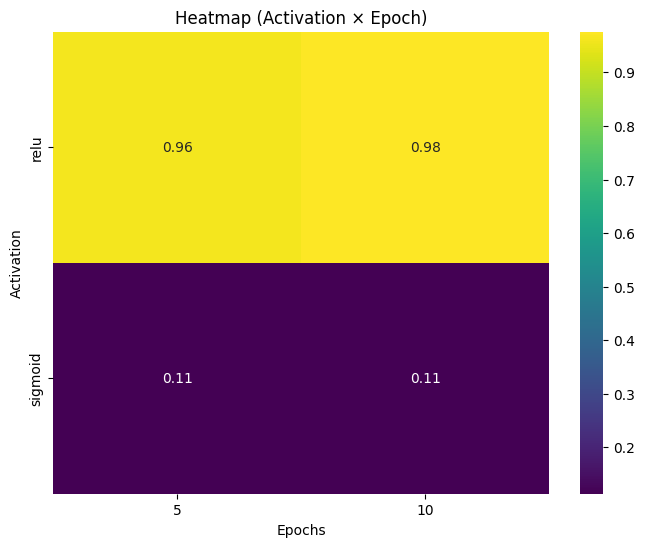

In [ ]:
pivot_sample = df_part1.pivot_table(
    values="Test Accuracy",
    index="Activation",
    columns="Epochs"
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_sample, annot=True, cmap="viridis")
plt.title("Heatmap (Activation × Epoch)")
plt.show()

Testing random sample with same and different activations functions.

with Adam

In [ ]:
# Random 6000 sample
np.random.seed(42)

indices = np.random.choice(len(x_train_full), 6000, replace=False)

x_train_small = x_train_full[indices]
y_train_small = y_train_full[indices]

In [ ]:
activation_configs = {
    "All_ReLU": ["relu"]*6,
    "All_Tanh": ["tanh"]*6,
    "All_Sigmoid": ["sigmoid"]*6,
    "Mixed": ["relu","tanh","sigmoid","relu","tanh","sigmoid"]
}

In [ ]:
results_part2 = []

epochs_list = [5, 10]
batch_sizes = [32, 256]

for name, acts in activation_configs.items():
    for ep in epochs_list:
        for batch in batch_sizes:

            print(f"{name} | Epochs={ep} | Batch={batch}")

            model = build_cnn_model(acts[0], "adam")

            start_time = time.time()

            history = model.fit(
                x_train_small,
                y_train_small,
                epochs=ep,
                batch_size=batch,
                validation_split=0.2,
                verbose=0
            )

            training_time = time.time() - start_time

            test_loss, test_accuracy = model.evaluate(
                x_test, y_test_cat, verbose=0
            )

            results_part2.append([
                name,
                "Adam",
                ep,
                batch,
                round(test_accuracy,4),
                round(training_time,2)
            ])

df_part2 = pd.DataFrame(
    results_part2,
    columns=["Activation", "Optimizer", "Epochs",
             "Batch Size", "Test Accuracy", "Training Time (s)"]
)

print("\n===== PART 2 RESULTS (6000 Sample) =====\n")
display(df_part2)

All_ReLU | Epochs=5 | Batch=32
All_ReLU | Epochs=5 | Batch=256
All_ReLU | Epochs=10 | Batch=32
All_ReLU | Epochs=10 | Batch=256
All_Tanh | Epochs=5 | Batch=32
All_Tanh | Epochs=5 | Batch=256
All_Tanh | Epochs=10 | Batch=32
All_Tanh | Epochs=10 | Batch=256
All_Sigmoid | Epochs=5 | Batch=32
All_Sigmoid | Epochs=5 | Batch=256
All_Sigmoid | Epochs=10 | Batch=32
All_Sigmoid | Epochs=10 | Batch=256
Mixed | Epochs=5 | Batch=32
Mixed | Epochs=5 | Batch=256
Mixed | Epochs=10 | Batch=32
Mixed | Epochs=10 | Batch=256

===== PART 2 RESULTS (6000 Sample) =====



,Activation,Optimizer,Epochs,Batch Size,Test Accuracy,Training Time (s)
0,All_ReLU,Adam,5,32,0.9683,53.59
1,All_ReLU,Adam,5,256,0.9374,45.42
2,All_ReLU,Adam,10,32,0.9748,87.95
3,All_ReLU,Adam,10,256,0.9623,75.66
4,All_Tanh,Adam,5,32,0.9688,47.87
5,All_Tanh,Adam,5,256,0.9416,45.17
6,All_Tanh,Adam,10,32,0.9704,91.74
7,All_Tanh,Adam,10,256,0.9668,77.33
8,All_Sigmoid,Adam,5,32,0.1135,46.87
9,All_Sigmoid,Adam,5,256,0.1028,38.51


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


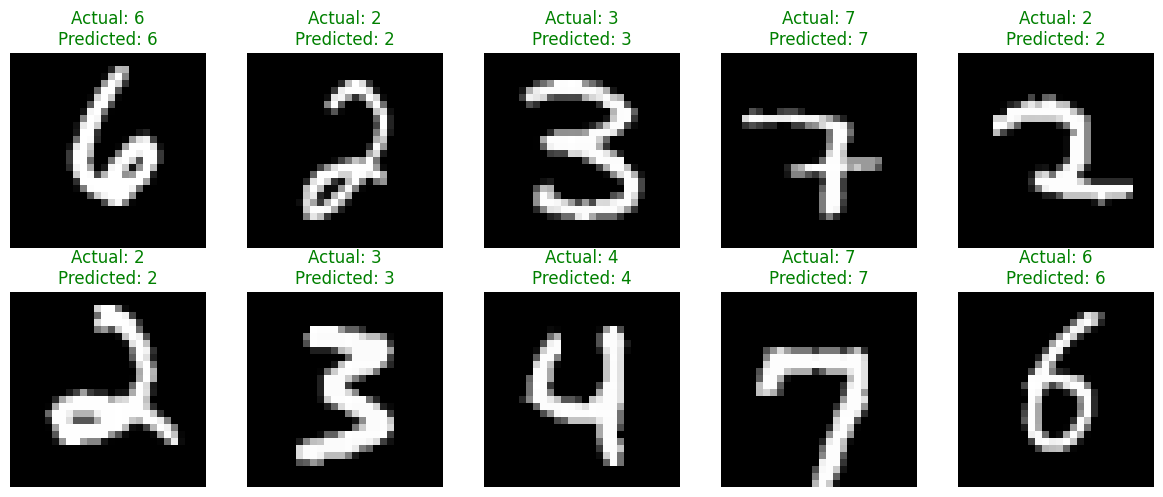

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select 10 test samples
np.random.seed(42)
random_indices = np.random.choice(len(x_test), 10, replace=False)

random_images = x_test[random_indices]
random_labels = y_test[random_indices]

# Make predictions
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot results
plt.figure(figsize=(12,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(random_images[i].reshape(28,28), cmap='gray')

    color = "green" if random_labels[i] == predicted_labels[i] else "red"

    plt.title(
        f"Actual: {random_labels[i]}\nPredicted: {predicted_labels[i]}",
        color=color
    )

    plt.axis('off')

plt.tight_layout()
plt.show()

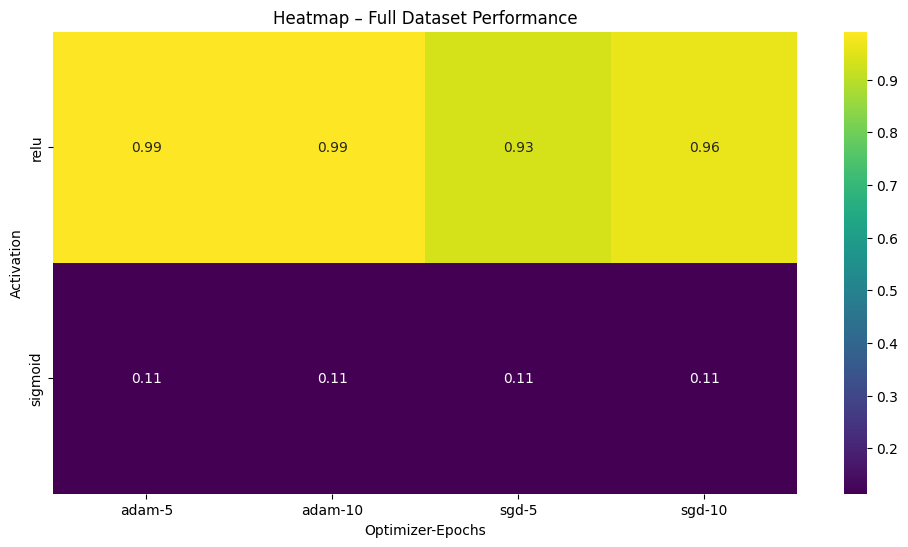

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Experiment' column to existing dataframes
df_part1['Experiment'] = 'Full Dataset'
df_part2['Experiment'] = '6000 Sample'

# Concatenate df_part1 and df_part2 to create df_all
df_all = pd.concat([df_part1, df_part2], ignore_index=True)

pivot_full = df_all[df_all["Experiment"] == "Full Dataset"] \
    .pivot_table(
        values="Test Accuracy",
        index="Activation",
        columns=["Optimizer", "Epochs"]
    )

plt.figure(figsize=(12,6))
sns.heatmap(pivot_full, annot=True, cmap="viridis")
plt.title("Heatmap – Full Dataset Performance")
plt.show()

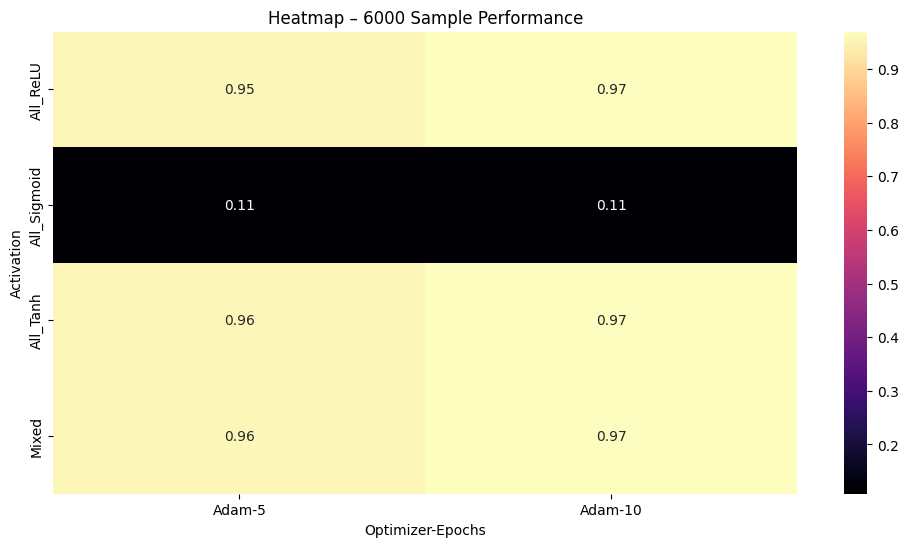

In [ ]:
pivot_6000 = df_all[df_all["Experiment"] == "6000 Sample"] \
    .pivot_table(
        values="Test Accuracy",
        index="Activation",
        columns=["Optimizer", "Epochs"]
    )

plt.figure(figsize=(12,6))
sns.heatmap(pivot_6000, annot=True, cmap="magma")
plt.title("Heatmap – 6000 Sample Performance")
plt.show()

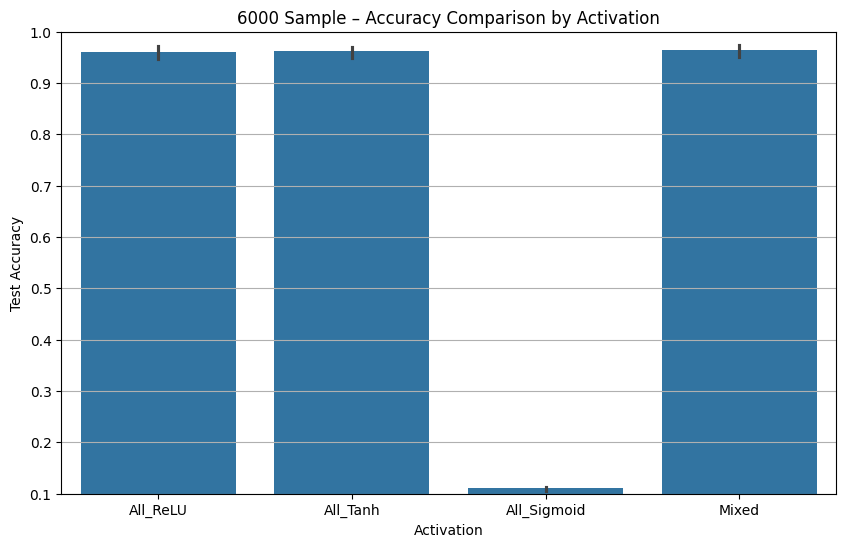

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

df_sample = df_all[df_all['Experiment'] == '6000 Sample']

sns.barplot(
    data=df_sample,
    x="Activation",
    y="Test Accuracy"
)

plt.title("6000 Sample – Accuracy Comparison by Activation")
plt.ylim(0.1,1.0)
plt.grid(axis='y')
plt.show()

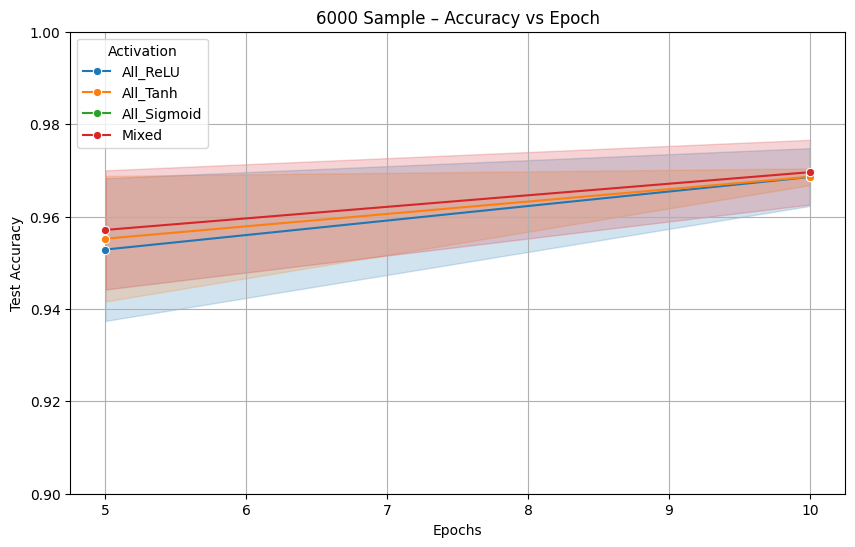

In [ ]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df_sample,
    x="Epochs",
    y="Test Accuracy",
    hue="Activation",
    marker="o"
)

plt.title("6000 Sample – Accuracy vs Epoch")
plt.ylim(0.9,1.0)
plt.grid(True)
plt.show()

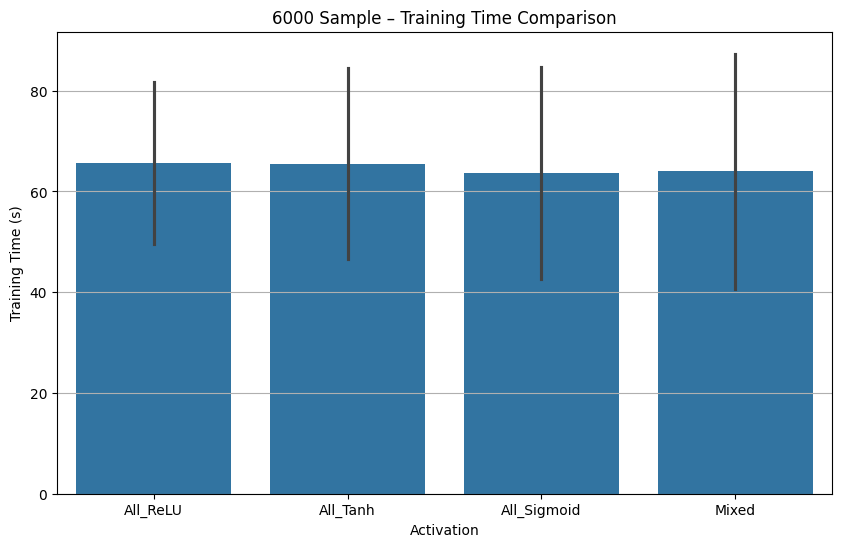

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_sample,
    x="Activation",
    y="Training Time (s)"
)

plt.title("6000 Sample – Training Time Comparison")
plt.grid(axis='y')
plt.show()

Testing on handwritten sample with Activation: Relu, Sigmoid
Optimizer: Adam

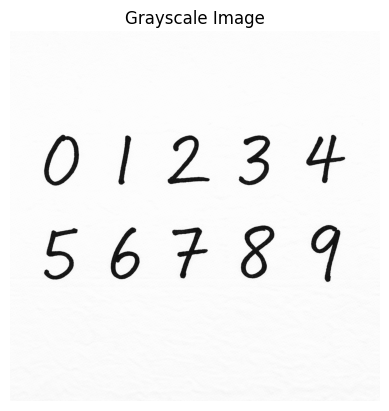

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "/content/hw.png"
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

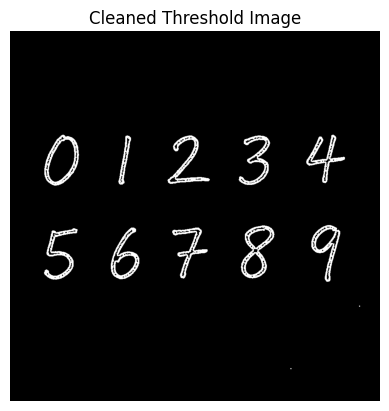

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 0)

thresh = cv2.adaptiveThreshold(
    blur,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)

# Optional: Remove small noise
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.imshow(thresh, cmap='gray')
plt.title("Cleaned Threshold Image")
plt.axis('off')
plt.show()


In [ ]:
contours, _ = cv2.findContours(
    thresh,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

digit_images = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    if w > 20 and h > 20:   # remove noise
        digit = thresh[y:y+h, x:x+w]
        digit_images.append((x, digit))

digit_images = sorted(digit_images, key=lambda x: x[0])
digit_images = [d[1] for d in digit_images]

In [ ]:
processed_digits = []

for digit in digit_images:

    # Make square by padding
    h, w = digit.shape
    size = max(h, w)

    padded = np.zeros((size, size), dtype=np.uint8)
    padded[(size-h)//2:(size-h)//2+h,
           (size-w)//2:(size-w)//2+w] = digit

    # Resize to 28x28
    resized = cv2.resize(padded, (28,28))

    # Normalize
    resized = resized / 255.0

    processed_digits.append(resized)

processed_digits = np.array(processed_digits)
processed_digits = processed_digits.reshape(-1,28,28,1)


In [ ]:
model = build_cnn_model('relu', "adam")

model.fit(
    x_train_small,
    y_train_small,
    epochs=15,
    batch_size=128,
    verbose=1
)

# Make predictions on the processed_digits
predictions = model.predict(processed_digits)
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted Labels for processed digits:", predicted_labels)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.3498 - loss: 1.8493
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.7964 - loss: 0.6293
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.8778 - loss: 0.3810
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.9145 - loss: 0.2699
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.9337 - loss: 0.2228
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.9385 - loss: 0.2008
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.9502 - loss: 0.1621
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.9550 - loss: 0.1440
Epoch 9/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.9568 - loss: 0.1295
Epoch 10/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.9666 - loss: 0.1056
Epoch 11/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.9657 - loss: 0.1126
Epoch 12/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 177m

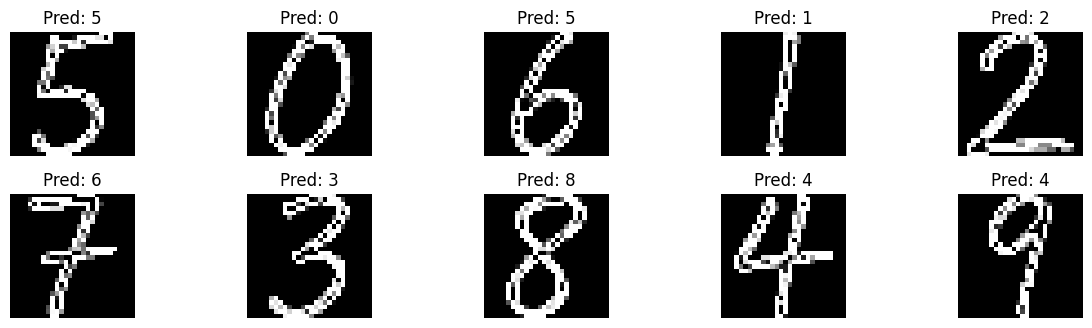

In [ ]:
plt.figure(figsize=(12,5))

for i in range(len(processed_digits)):
    plt.subplot(3,5,i+1)
    plt.imshow(processed_digits[i].reshape(28,28), cmap='gray')

    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model = build_cnn_model('sigmoid', "adam")

model.fit(
    x_train_small,
    y_train_small,
    epochs=15,
    batch_size=128,
    verbose=1
)

# Make predictions on the processed_digits
predictions = model.predict(processed_digits)
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted Labels for processed digits:", predicted_labels)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.1188 - loss: 2.3309
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.1074 - loss: 2.3131
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.1015 - loss: 2.3144
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.0974 - loss: 2.3174
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.0977 - loss: 2.3114
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.0878 - loss: 2.3138
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.0971 - loss: 2.3120
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.0951 - loss: 2.3140
Epoch 9/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.0908 - loss: 2.3120
Epoch 10/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.0979 - loss: 2.3121
Epoch 11/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - accuracy: 0.0932 - loss: 2.3103
Epoch 12/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/s

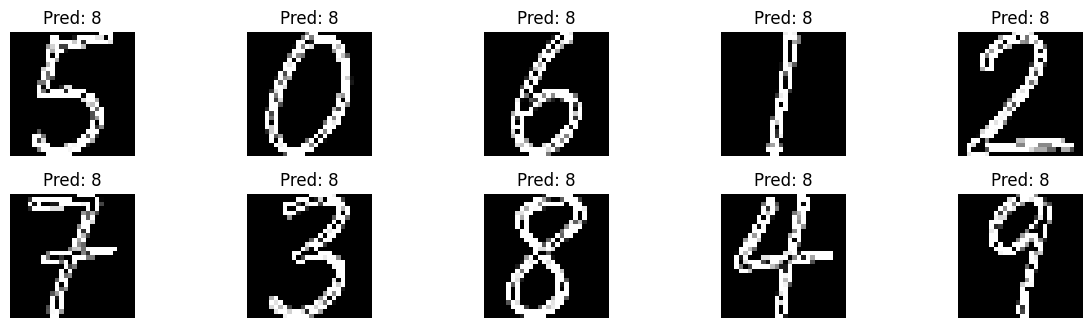

In [ ]:
plt.figure(figsize=(12,5))

for i in range(len(processed_digits)):
    plt.subplot(3,5,i+1)
    plt.imshow(processed_digits[i].reshape(28,28), cmap='gray')

    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()